In [1]:
import os
import sys
# Use the current working directory instead of __file__
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

import matplotlib.pyplot as plt
import pandas as pd
import hardware_control.wx_programs as wx
import hardware_control.bnc as bnc
from classes.generator import *
from hardware_control.hardware_config import *
from experiment_configuration.values import *
from classes.qubit_class import *
import daq.daq_programs_homo as daq
import seaborn as sns
import standard_sequences.pinopi as pnp

In [2]:
q1 = Qubit(q1_dict, readout_dict)
q2 = Qubit(q2_dict, readout_dict)
print(f"{q1}\n{q2}")

Qubit(RO_LO=6.6247, RO_LO_pwr=16, ef_ssm=-0.2568, RO_IF=None, qubit_thr=[-10000, -600], ro_dur=4000, ge_ssm=-0.1145, IQ_angle=205, qubit_id=q1, ef_amp=1.5, ro_amp=1, ge_amp=0.8, ro_freq=6.72745, ROIF=0.10275000000000034, ef_time=49.13671850689116, ge_time=81.17534608287957)
Qubit(RO_LO=6.6247, RO_LO_pwr=16, ef_ssm=-0.2962, RO_IF=None, qubit_thr=[-10000, 1900], ro_dur=4000, ge_ssm=-0.154, IQ_angle=85, qubit_id=q2, ef_amp=1, ro_amp=1.5, ge_amp=0.8, ro_freq=6.6556, ROIF=0.030899999999999928, ef_time=None, ge_time=45.047198597262124)


In [3]:
general_vals_dict['wx_offs'] =[0.7, 0, -0.08, 0]


In [4]:
wx_addr = wx.get_wx_address()
main_directory = r"C:\Users\quantum1\Documents"
save_dir = rf"{main_directory}\Python Scripts\Important Blue Fridge Python Files\New\nonlinear_QM\data"
target_bnc_address_6 = "USB0::0x03EB::0xAFFF::411-433500000-0753::INSTR"
bnc.set_bnc_output(
    general_vals_dict["qubit_bnc"], power_dBm=13, bnc_addr=target_bnc_address_6
)
bnc.set_bnc_output(readout_dict['RO_LO'],power_dBm=readout_dict['RO_LO_pwr'], bnc_addr=bnc_address['target_bnc_black'])
bnc.set_bnc_output(general_vals_dict['TWPA_freq'], general_vals_dict['TWPA_pwr'], bnc_addr=bnc_address['big_agilent'])
num_steps = 3
reps = 150000
swap_freq= -.0195
swap_time=0.5*6/abs(swap_freq)


writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 150000
Buffers per acquistion: 147
DAQ samples per pattern: 8192
0, No error
Capturing 147 buffers. Press <enter> to abort
Capture completed in 49.618811 sec
Captured 147 buffers (2.962586 buffers per sec)
Captured 451584 records (9101.064577 records per sec)
Transferred 7398752256 bytes (149111842.031834 bytes per sec)


<Figure size 800x800 with 0 Axes>

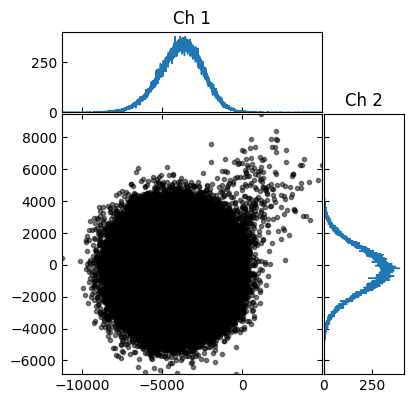

<Figure size 800x800 with 0 Axes>

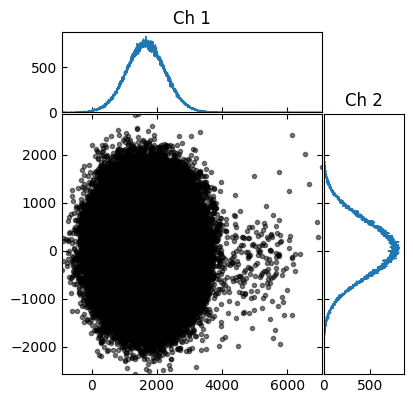

saved G
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 150000
Buffers per acquistion: 147
DAQ samples per pattern: 8192
0, No error
Capturing 147 buffers. Press <enter> to abort
Capture completed in 49.856441 sec
Captured 147 buffers (2.948466 buffers per sec)
Captured 451584 records (9057.686200 records per sec)
Transferred 7398752256 bytes (148401130.708610 bytes per sec)


<Figure size 800x800 with 0 Axes>

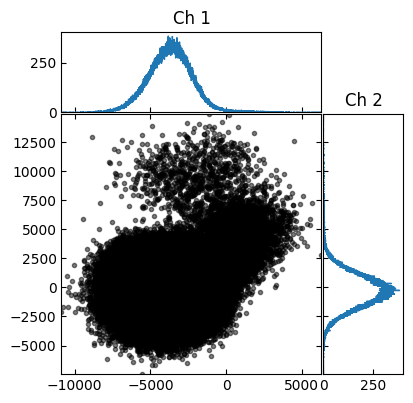

<Figure size 800x800 with 0 Axes>

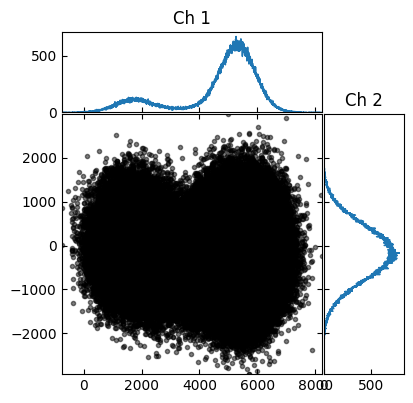

saved E
writing to C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
writing ch1
writing ch2
writing ch3
writing ch4
loading C:\arbsequences\strong_dispersive_withPython\test_pulse_ringupdown_bin\
num_steps 3
loading ch1
loading ch2
loading ch3
loading ch4
0, No error
0, No error
0, No error
0, No error
0, No error
0, No error
Patterns: 3
Records per pattern: 150000
Buffers per acquistion: 147
DAQ samples per pattern: 8192
0, No error
Capturing 147 buffers. Press <enter> to abort
Capture completed in 49.017661 sec
Captured 147 buffers (2.998919 buffers per sec)
Captured 451584 records (9212.679424 records per sec)
Transferred 7398752256 bytes (150940539.690870 bytes per sec)


<Figure size 800x800 with 0 Axes>

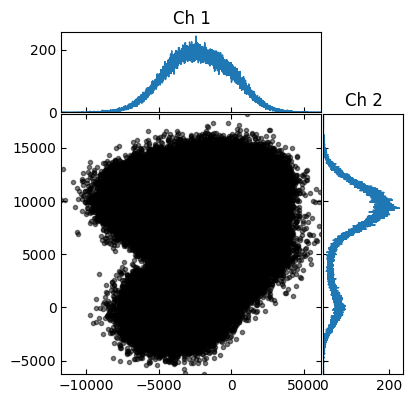

<Figure size 800x800 with 0 Axes>

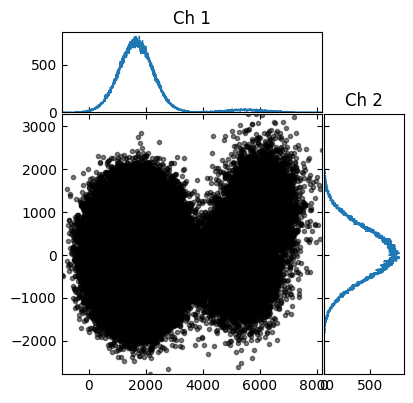

saved F


In [5]:
phase = 0
swap_amp=1.23
for i in range(3):
    if 0 == i:
        label = 'G'
        pnp.pi_nopi_swap(q1, q2, general_vals_dict, copief = 0, coswap = 1,copige = 0,num_steps = 3,swap_freq =  swap_freq, swap_time = swap_time,phase=phase,swap_amp=swap_amp)
    elif 1 == i:
        label = 'E'
        # E prep
        pnp.pi_nopi_swap(q1, q2, general_vals_dict, copief = 0, coswap = 1,copige = 1,num_steps = 3,swap_freq =  swap_freq, swap_time = swap_time,phase=phase,swap_amp=swap_amp)
    elif 2 == i:
        label = 'F'
        # F prep
        pnp.pi_nopi_swap(q1, q2, general_vals_dict, copief = 1, coswap = 1,copige = 1,num_steps = 3,swap_freq =  swap_freq, swap_time = swap_time,phase=phase,swap_amp=swap_amp)

    wx.wx_set_and_amplitude_and_offset(
        amp=general_vals_dict["wx_amps"], offset=general_vals_dict["wx_offs"]
    )
    values = daq.run_daq_het_2q(q1, q2,
                    num_patterns=num_steps, num_records_per_pattern=reps,
                        verbose=True)

    # Retrieve raw IQ data from the acquired values
    I1_raw = values.rec_readout_1[0][0:reps*num_steps]
    Q1_raw = values.rec_readout_1[1][0:reps*num_steps]
    I2_raw = values.rec_readout_2[0][0:reps*num_steps]
    Q2_raw = values.rec_readout_2[1][0:reps*num_steps]

    # Build a DataFrame from the IQ data for classification
    IQ_df = pd.DataFrame({
        "I1": I1_raw,
        "Q1": Q1_raw,
        "I2": I2_raw,
        "Q2": Q2_raw
    })
    if 0 == i:
        g_IQ = IQ_df
    elif 1 == i:
        e_IQ = IQ_df
    else:
        f_IQ = IQ_df
    IQ_df.to_csv(f'IQraw{label}.csv')
    print(f"saved {label}")

In [6]:
g_IQ['label'] = [0 for _ in range(len(g_IQ))]
e_IQ['label'] = [1 for _ in range(len(e_IQ))]
f_IQ['label'] = [2 for _ in range(len(f_IQ))]

three_state = pd.concat([g_IQ, e_IQ, f_IQ ], axis = 0)
try:
    three_state = three_state.drop(columns="Unnamed: 0")
except:
    pass
three_state = three_state.sample(frac=1).reset_index(drop=True)
three_state.head()

three_state.to_csv('three_state.csv')

print('saved three_state')

saved three_state


In [7]:
current_dir = os.getcwd()

if 'three_state.csv' in os.listdir(current_dir):
    print('three_state.csv in current directory')
    
    for file in ['IQrawE.csv', 'IQrawF.csv', 'IQrawG.csv']:
        try:
            os.remove(file)
        except FileNotFoundError:
            print(f"No {file}")

else:
    print('three_state.csv not in current directory')

data_dir = "training_and_test_data"

# Ensure 'three_state.csv' exists before moving
if os.path.exists('three_state.csv'):
    try:
        os.remove(os.path.join(data_dir, 'three_state.csv'))
        print('Removed existing three_state.csv from training_and_test_data')
    except FileNotFoundError:
        pass
    os.rename('three_state.csv', os.path.join(data_dir, 'three_state.csv'))
    print('Moved three_state.csv to training_and_test_data')
else:
    print('Error: three_state.csv not found in the current directory')


three_state.csv in current directory
Removed existing three_state.csv from training_and_test_data
Moved three_state.csv to training_and_test_data


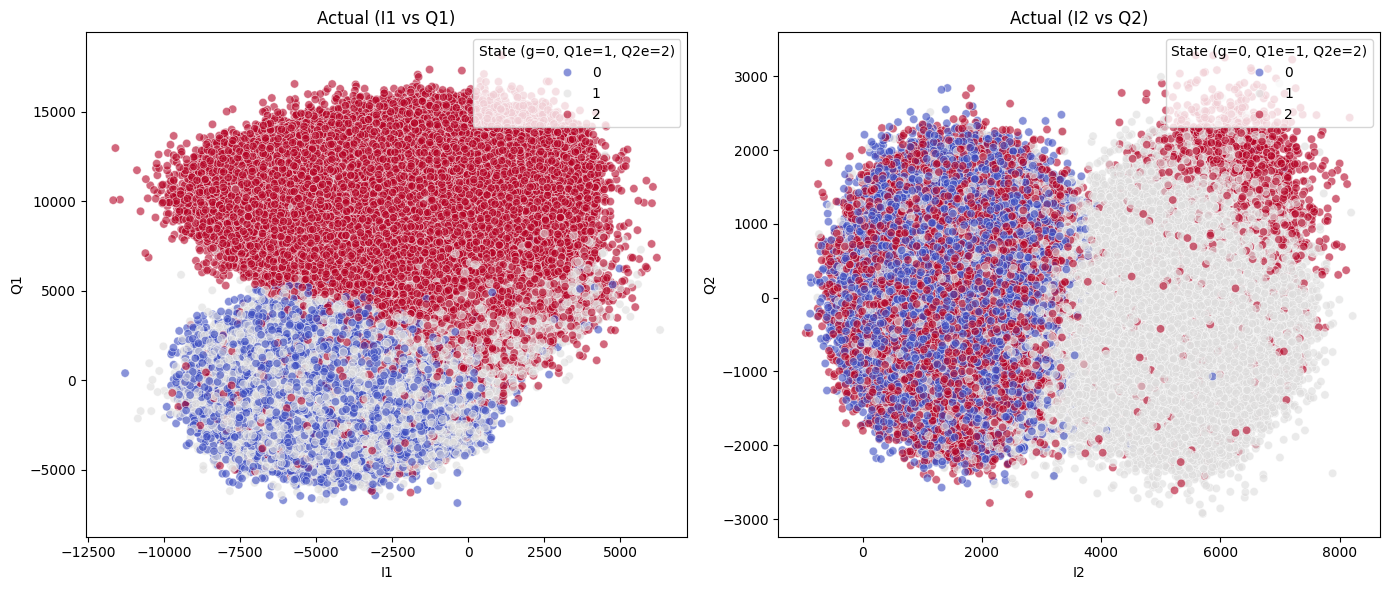

In [8]:
# Create subplots (1 row, 2 columns)
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sliced_data = three_state
# First subplot: I1 vs Q1
sns.scatterplot(
    data=sliced_data,
    x="I1",
    y="Q1",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[0],
)
axes[0].set_xlabel("I1")
axes[0].set_ylabel("Q1")
axes[0].set_title("Actual (I1 vs Q1)")
axes[0].legend(title="State (g=0, Q1e=1, Q2e=2)", loc = 'upper right')

# Second subplot: I2 vs Q2
sns.scatterplot(
    data=sliced_data,
    x="I2",
    y="Q2",
    hue="label",
    palette="coolwarm",
    alpha=0.6,
    ax=axes[1],
)
axes[1].set_xlabel("I2")
axes[1].set_ylabel("Q2")
axes[1].set_title("Actual (I2 vs Q2)")
axes[1].legend(title="State (g=0, Q1e=1, Q2e=2)", loc = 'upper right')

# Adjust layout for better spacing
plt.tight_layout()
plt.show()